In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

%matplotlib inline

# Problem 1

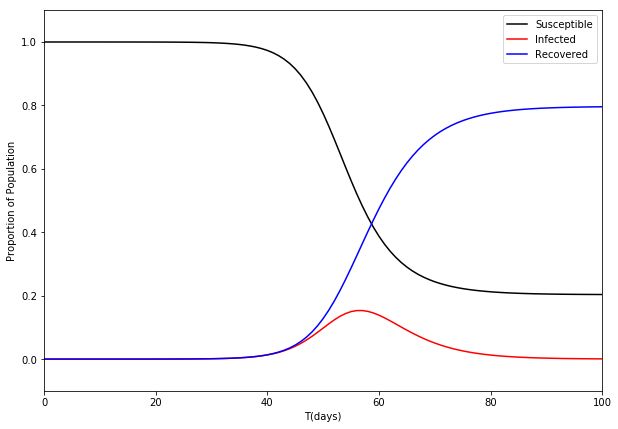

In [3]:
def ode(y, t):
    return np.array([-.5*y[1]*y[0], .5*y[1]*y[0] - .25*y[1], .25*y[1]])

R = 0
I = 6.25e-7
S = 1 - I
t = np.linspace(0,100,101)
sol = odeint(ode, np.array([S,I,R]), t)
# print(sol)

plt.figure(figsize=(10,7))
plt.plot(t,sol[:,0],'k',label='Susceptible')
plt.plot(t,sol[:,1],'r',label='Infected')
plt.plot(t,sol[:,2],'b',label='Recovered')
plt.xlim((0,100))
plt.ylim((-0.1,1.1))
plt.xlabel('T(days)')
plt.ylabel('Proportion of Population')
plt.legend()
plt.show()

# Problem 2

Peak of Infection occurs at:
t = 21.287128712871286
I = 0.29995255645752417
Therefore, about 899859 people are sick at the peak of infection.


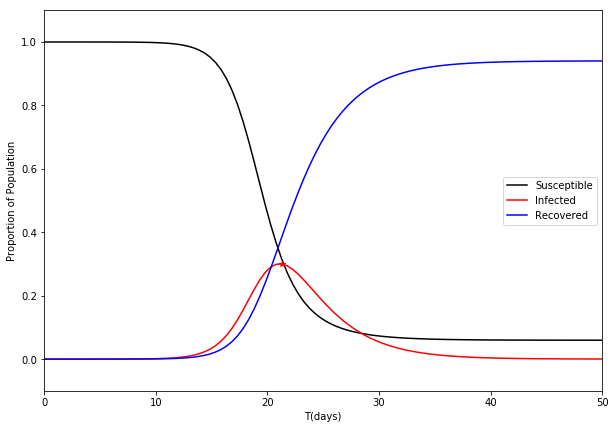

In [4]:
def ode(y, t):
    beta = 1       # Each person in I has one contact per day that can spread the disease
    gamma = 1./3   # The reciprocal of the average lenght of time spent as infected.
    return np.array([-beta*y[1]*y[0], beta*y[1]*y[0] - gamma*y[1], gamma*y[1]])

R = 0
I = 5              # 5 people are infected
S = 3000000        # 3,000,000 people are already in the city and not infected
total_pop = S + I + R
I = I/total_pop
S = S/total_pop
t = np.linspace(0,50,2*51)
sol = odeint(ode, np.array([S,I,R]), t)

maximum = np.argmax(sol[:,1])

print("Peak of Infection occurs at:\nt = {0}\nI = {1}\nTherefore, about {2} people are sick at the peak of infection.".format(t[maximum],sol[maximum,1],int(total_pop*sol[maximum,1])))
plt.figure(figsize=(10,7))
plt.plot(t,sol[:,0],'k',label='Susceptible')
plt.plot(t,sol[:,1],'r',label='Infected')
plt.plot(t,sol[:,2],'b',label='Recovered')
plt.plot(t[maximum],sol[maximum,1],'*r')
plt.xlim((0,50))
plt.ylim((-0.1,1.1))
plt.xlabel('T(days)')
plt.ylabel('Proportion of Population')
plt.legend()
plt.show()

# Problem 3

Peak of Infection occurs at:
t = 211.0
I = 0.014733230374838237
Therefore, about 44199 people are sick at the peak of infection.


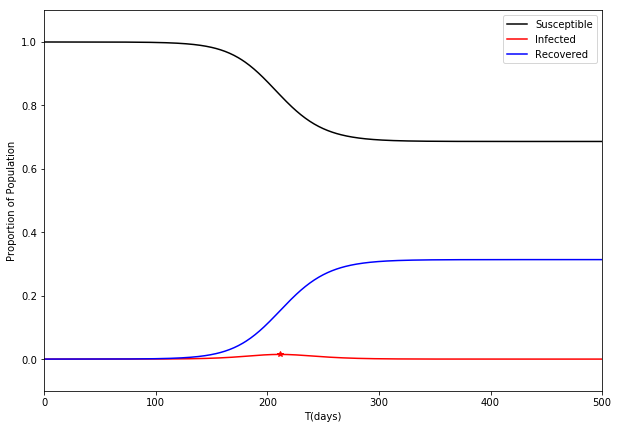

In [5]:
def ode(y, t):
    beta = 3./10   # Each person in I has one contact per day that can spread the disease
    gamma = 1./4   # The reciprocal of the average lenght of time spent as infected.
    return np.array([-beta*y[1]*y[0], beta*y[1]*y[0] - gamma*y[1], gamma*y[1]])

R = 0
I = 5              # 5 people are infected
S = 3000000        # 3,000,000 people are already in the city and not infected
total_pop = S + I + R
R = R/total_pop
I = I/total_pop
S = S/total_pop
t = np.linspace(0,500,501)
sol = odeint(ode, np.array([S,I,R]), t)

maximum = np.argmax(sol[:,1])

print("Peak of Infection occurs at:\nt = {0}\nI = {1}\nTherefore, about {2} people are sick at the peak of infection.".format(t[maximum],sol[maximum,1],int(total_pop*sol[maximum,1])))
plt.figure(figsize=(10,7))
plt.plot(t,sol[:,0],'k',label='Susceptible')
plt.plot(t,sol[:,1],'r',label='Infected')
plt.plot(t,sol[:,2],'b',label='Recovered')
plt.plot(t[maximum],sol[maximum,1],'*r')
plt.xlim((0,500))
plt.ylim((-0.1,1.1))
plt.xlabel('T(days)')
plt.ylabel('Proportion of Population')
plt.legend()
plt.show()

# Problem 4

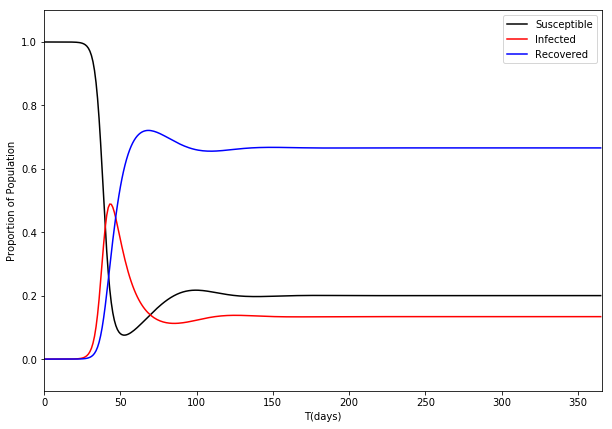

In [6]:
def ode(y,t):
    S,I,R = y
    f = 1/50     # Rate at which recovered people become susceptible again
    mu = .0001   # Death/birth rate
    beta = 1/2   # Someone makes a contact every other day to infect someone else
    gamma = 1/10 # Reciprocal of how long people are sick (10 days)
    return np.array([f*R + mu*(1 - S) - beta*I*S, beta*I*S - (gamma + mu)*I, -f*R + gamma*I - mu*R])

total_pop = 7000000000
R = 0 / total_pop
I = 1000 / total_pop
S = (total_pop - I) / total_pop
t = np.linspace(0,365,366)

sol = odeint(ode, np.array([S,I,R]), t)

plt.figure(figsize=(10,7))
plt.plot(t,sol[:,0],'k',label='Susceptible')
plt.plot(t,sol[:,1],'r',label='Infected')
plt.plot(t,sol[:,2],'b',label='Recovered')
plt.xlim((0,366))
plt.ylim((-0.1,1.1))
plt.xlabel('T(days)')
plt.ylabel('Proportion of Population')
plt.legend()
plt.show()

# Problem 5

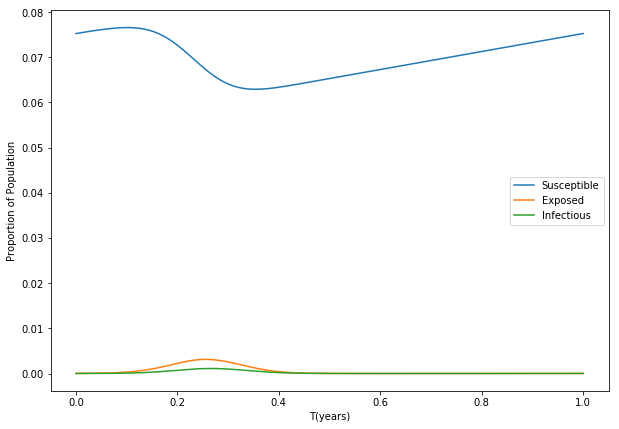

In [12]:
from scipy.integrate import solve_bvp

b0 = 1575
b1 = 1
eta = 0.01
lambd = .0279
mu = .02
T = np.linspace(0,1,366)

def beta(t):
    return b0*(1 + b1*np.cos(2*np.pi*t))

def ode(t, y):
    length = len(y[0])
    return np.array([mu-beta(t)*y[0]*y[2], beta(t)*y[0]*y[2]-y[1]/lambd,
                     y[1]/lambd - y[2]/eta, 0*np.zeros(length), 0*np.zeros(length), 0*np.zeros(length)])

def bcs(ya,yb):
    BCa = ya[0:3] - ya[3:]
    BCb = yb[0:3] - yb[3:]
    return np.hstack([BCa, BCb])

Y = np.array([.07, .0001, .0001, .08, .0001, .0001]).reshape((-1,1))*np.ones((6,len(T)))

sol = solve_bvp(ode, bcs, T, Y).sol(T)

# print(sol)
    
plt.figure(figsize=(10,7))
plt.plot(T,sol[0][:], label = 'Susceptible')
plt.plot(T,sol[1][:], label = 'Exposed')
plt.plot(T,sol[2][:], label = 'Infectious')
plt.legend()
plt.xlabel("T(years)")
plt.ylabel("Proportion of Population")
plt.show()